In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
class gridworld(object):
    
    def __init__(self, gamma=.9, rows=5, columns=5):
        self.grid = np.zeros((rows, columns))
        self.rows = rows
        self.columns = columns
        self.gamma = gamma
        self.p = .25
        self.special_case = False
        print(self.grid)

        
    def moveNorth(self, current_state):
        self.next_state = current_state + [-1, 0]
        return self.next_state
    
    def moveEast(self, current_state):
        self.next_state = current_state + [0, 1]
        return self.next_state

    def moveSouth(self, current_state):
        self.next_state = current_state + [1, 0]
        return self.next_state
    
    def moveWest(self, current_state):
        self.next_state = current_state + [0, -1]
        return self.next_state
    
    def move(self, current_state):
        total_values = 0
        
        # Special state A
        if (current_state == [0, 1]).all():
            self.special_case = True
            self.next_state = np.array([4, 1])
            self.R = 10
            self.next_state_v = self.grid[self.next_state[0], self.next_state[1]]
            self.special_state_value =  self.R + self.gamma * self.next_state_v
            total_values += 4 * self.p * self.special_state_value

        # Special state B
        elif (current_state == [0, 3]).all():
            self.special_case = True
            self.next_state = np.array([2, 3])
            self.R = 5
            self.next_state_v = self.grid[self.next_state[0], self.next_state[1]]
            self.special_state_value =  self.R + self.gamma * self.next_state_v
            total_values += 4 * self.p * self.special_state_value
            
        else:
        
            # Move North
            self.next_state = self.moveNorth(current_state)
            if self.next_state[0] <0:
                self.R = -1
                self.next_state = current_state
            else:
                self.R = 0

            self.next_state_v = self.grid[self.next_state[0], self.next_state[1]]
            self.north_action_value =  self.R + self.gamma * self.next_state_v
            total_values += self.p * self.north_action_value

            # Move East
            self.next_state = self.moveEast(current_state)
            if self.next_state[1] > self.rows-1:
                self.R = -1
                self.next_state = current_state
            else:
                self.R = 0

            self.next_state_v = self.grid[self.next_state[0], self.next_state[1]]
            self.east_action_value =  (self.R + self.gamma * self.next_state_v)
            total_values += self.p * self.east_action_value

            # Move South
            self.next_state = self.moveSouth(current_state)
            if self.next_state[0] > self.columns-1:
                self.R = -1
                self.next_state = current_state
            else:
                self.R = 0

            self.next_state_v = self.grid[self.next_state[0], self.next_state[1]]
            self.south_action_value =  (self.R + self.gamma * self.next_state_v)
            total_values += self.p * self.south_action_value

            # Move West
            self.next_state = self.moveWest(current_state)
            if self.next_state[1] <0:
                self.R = -1
                self.next_state = current_state
            else:
                self.R = 0

            self.next_state_v = self.grid[self.next_state[0], self.next_state[1]]
            self.west_action_value =  (self.R + self.gamma * self.next_state_v)
            total_values += self.p * self.west_action_value
            
        if self.special_case:
            return total_values, self.special_state_value
        else:
            return total_values, np.max([self.north_action_value, self.east_action_value,
                                        self.south_action_value, self.west_action_value])
    
    def update(self):
        for i in range(0, 5):
            for j in range(0, 5):
                self.current_state = np.array([i, j])
                state_value = self.move(self.current_state)[0]
                self.grid[i, j] = state_value
                
    def optimalV(self):
        for i in range(0, 5):
            for j in range(0, 5):
                self.current_state = np.array([i, j])
                state_value = self.move(self.current_state)[1]
                self.grid[i, j] = state_value
    
    def play(self, k=100):
        for x in range(k):
            self.update()     
        return np.round(self.grid, decimals=1).tolist()
    
    def findOptimalV(self, k=100):
        for x in range(k):
            self.optimalV()     
        return np.round(self.grid, decimals=1).tolist()


In [63]:
G = gridworld()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [64]:
G.play()

[[3.3, 8.8, 4.4, 5.3, 1.5],
 [1.5, 3.0, 2.3, 1.9, 0.5],
 [0.1, 0.7, 0.7, 0.4, -0.4],
 [-1.0, -0.4, -0.4, -0.6, -1.2],
 [-1.9, -1.3, -1.2, -1.4, -2.0]]

In [65]:
G.findOptimalV(1000)

[[50.0, 55.0, 55.0, 50.0, 50.0],
 [50.0, 50.0, 50.0, 50.0, 50.0],
 [50.0, 50.0, 50.0, 50.0, 50.0],
 [50.0, 50.0, 50.0, 50.0, 50.0],
 [50.0, 50.0, 50.0, 50.0, 50.0]]

---

In [ ]:
class girdWorld(object):

    def __init__(self, gamma=.9):        
        self.grid = np.zeros((5, 5))
        self.p = .25
        self.gamma = gamma
        print(grid)
    
    def update(self):
        for i in range(5):
            for j in range(5):
                up = self.grid[i-1][j] if i>0 else 0
                left = self.grid[i][j-1] if j>0 else 0
                down = self.grid[i+1][j] if i < 3 else 0
                right = self.grid[i][j+1] if j < 3 else 0
                
                actions = [up, left, down, right]
                value = 0
                if i==0 and j==1: # Position A
                    value = 10 + self.gamma*self.grid[4, 1]
                elif i==0 and j==3: # Position B
                    value = 5 + self.gamma*self.grid[2, 3]
                else:
                    for action in actions:
                        if action !=0:
                            value += self.p * (0 + self.gamma * action)
                        else:
                            value += self.p * (-1 + slef.gamma * action)
                            
                self.grid[i][j] = value
                
    def findOptimalValues(self):
        for i in range(5):
            for j in range(5):
                up = self.grid[i-1][j] if i>0 else 0
                left = self.grid[i][j-1] if j>0 else 0
                down = self.grid[i+1][j] if i < 3 else 0
                right = self.grid[i][j+1] if j < 3 else 0
                
                actions = [up, left, down, right]
                values = []
                if i==0 and j==1: # Position A
                    maxvalue = 10 + self.gamma*self.grid[4, 1]
                elif i==0 and j==3: # Position B
                    maxvalue = 5 + self.gamma*self.grid[4, 1]
                else:
                    for action in actions:
                        if actionm !=0:
                            values.append(self.p * (0 + self.gamma * action))
                        else:
                            values.append(self.p * (-1 + slef.gamma * action))
                    maxvalue = np.max(values)
                self.grid[i][j] = maxvalue   
                 
    def play(k=10):
        for i in range(10):
            self.update()
        return np.round(self.grid, 1).tolist()
                    

In [ ]:
G = gridworld()

In [ ]:
G.play()

In [ ]:
G.findOptimalV()

---

In [120]:
class gridWorld(object):
    def __init__(self):
        self.dim = [5, 5]
        self.v = np.zeros(self.dim)
        self.pos_A = [0, 1]
        self.pos_B = [0, 3]
        self.A_reward = 10
        self.B_reward = 5
        self.A_next_pos = [4, 1]
        self.B_next_pos = [2, 3]
        self.gamma = 0.9
        
        self.action_space = ["Up", "Down", "Left", "Right"]
        self.q = np.zeros((self.dim[0], self.dim[1], len(self.action_space)))
        self.action_prob = [.25] * 4
        
    def action(self, a):
        if self.s == self.pos_A:
            self.s = self.A_next_pos
            self.reward = self.A_reward
        elif self.s == self.pos_B:
            self.s = self.B_next_pos
            self.reward = self.B_reward
            
        elif a == "Up" and self.s[0] > 0:
            self.s[0]-=1
            self.reward = 0
        elif a == "Down" and self.s[0] < self.dim[0]-1:
            self.s[0]+=1
            self.reward =0
        elif a=="Left" and self.s[1] >0:
            self.s[1]-=1
            self.reward = 0
        elif a=="Right" and self.s[1] < self.dim[1]-1:
            self.s[1]+=1
            self.reward = 0
        else:
            self.reward = -1
        return self.s, self.reward
    
    def update(self):
        for k in range(100):
            self.v_next = np.zeros(self.dim)
            for i in range(self.dim[0]):
                for j in range(self.dim[1]):
                    for a in self.action_space:
                        self.s = [i, j]
                        s, r = self.action(a)
                        prob = self.action_prob[self.action_space.index(a)]
                        self.v_next[i, j] += prob * (r + self.gamma * self.v[s[0], s[1]])
            self.v = self.v_next.copy()
        return np.round(self.v, 1).tolist()
    
    def Opt_v(self):
        for k in range(100):
            self.q_next = self.q.copy()
            for i in range(self.dim[0]):
                for j in range(self.dim[1]):
                    for a in self.action_space:
                        self.s = [i, j]
                        s, r = self.action(a)
                        a_index = self.action_space.index(a)
                        self.q_next[i, j, a_index] = r + self.gamma * np.max(self.q[s[0], s[1]])
            self.q = self.q_next.copy()
        return np.round(np.max(self.q, axis=2), 1).tolist()
    
    def policy(self, q):
        qmax = np.max(q, axis=2)
        x = np.linspace(0, self.dim[0] - 1, self.dim[0]) + 0.5
        y = np.linspace(self.dim[1] - 1, 0, self.dim[1]) + 0.5
        X, Y = np.meshgrid(x, y)
        zeros = np.zeros(self.dim)
        
        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes()
        
        for k, a in enumerate(self.action_space):
            q_star = np.zeros(self.dim)
            for i in range(self.dim[0]):
                for j in reversed(range(self.dim[1])):
                    if q[i, j, k] == qmax[i, j]:
                        q_star[i, j] = 0.4
                        
            # plot
            if a=="Up":
                plt.quiver(X, Y, zeros, q_star, scale=1, units='xy')
            elif a == "Left":
                plt.quiver(X, Y, -q_star, zeros, scale=1, units='xy')
            elif a == "Down":
                plt.quiver(X, Y, zeros, -q_star, scale=1, units='xy')
            elif a == "Right":
                plt.quiver(X, Y, q_star, zeros, scale=1, units='xy')
                    
        plt.xlim([0, self.dim[0]])
        plt.ylim([0, self.dim[1]])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.grid()
        plt.show() 
        

In [121]:
G=gridWorld()

In [122]:
G.update()

[[3.3, 8.8, 4.4, 5.3, 1.5],
 [1.5, 3.0, 2.3, 1.9, 0.5],
 [0.1, 0.7, 0.7, 0.4, -0.4],
 [-1.0, -0.4, -0.4, -0.6, -1.2],
 [-1.9, -1.3, -1.2, -1.4, -2.0]]

In [123]:
G.Opt_v()

[[22.0, 24.4, 22.0, 19.4, 17.5],
 [19.8, 22.0, 19.8, 17.8, 16.0],
 [17.8, 19.8, 17.8, 16.0, 14.4],
 [16.0, 17.8, 16.0, 14.4, 13.0],
 [14.4, 16.0, 14.4, 13.0, 11.7]]

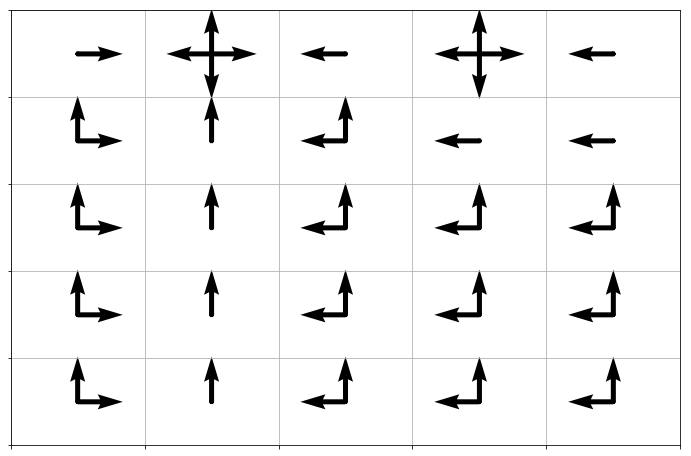

In [124]:
G.policy(G.q)